## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [12]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [11, 7]

data = pd.read_csv('datasets/office_episodes.csv')

In [2]:
data.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


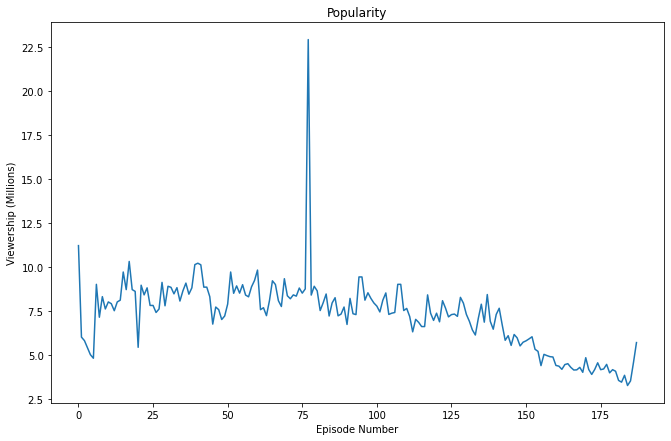

In [16]:
fig = plt.figure()

plt.title("Popularity")

plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

plt.plot(data['episode_number'], data['viewership_mil'])

In [4]:
colors = []
st = 'scaled_ratings'
for i,r in data.iterrows():
    if r[st] < 0.25:
        colors.append("red")
    elif r[st] >= 0.25 and r[st] < 0.50:
        colors.append("orange")
    elif r[st] >= 0.50 and r[st] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

sizes = []
for i,r in data.iterrows():
    if r['has_guests'] == True:
        sizes.append(250)
    else:
        sizes.append(25)

In [5]:
d = data.sort_values(by='viewership_mil',ascending=False)

In [6]:
d.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
17,17,2,The Injury,"Michael's ""injury"" from a George Foreman Grill...",9.1,4314,10.30,22,2006-01-12,NaN,Bryan Gordon,Mindy Kaling,False,0.78125
40,40,3,The Return,Andy does the impossible--he makes everyone in...,8.8,3211,10.20,28,2007-01-18,NaN,Greg Daniels,Lee Eisenberg | Gene Stupnitsky | Michael Schur,False,0.68750
39,39,3,Traveling Salesmen,Dwight does a favor for Angela to keep her fro...,8.6,3053,10.12,22,2007-01-11,NaN,Greg Daniels,Michael Schur | Lee Eisenberg | Gene Stupnitsky,False,0.62500


In [7]:
top_star = ''
for i,r in d.iterrows():
    if r['has_guests'] == True:
        top_star = r['guest_stars'].split(',')[0]
        break

In [8]:
print(top_star)

Cloris Leachman


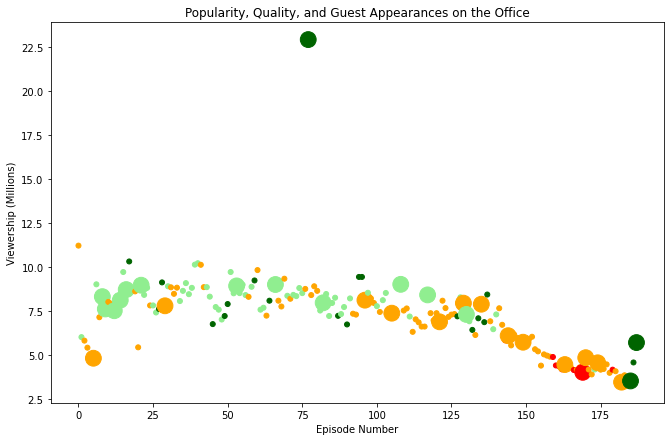

In [9]:
fig = plt.figure()

plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

plt.scatter(x=data['episode_number'],y= data['viewership_mil'],c=colors,s=sizes)

In [18]:
for i,r in d.iterrows():
    if r['has_guests'] == True:
        print(r['guest_stars'].split(','))
        print(r['viewership_mil'])
        break

['Cloris Leachman', ' Jack Black', ' Jessica Alba']
22.91
